In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append("..")
import source.explore as exp

pd.set_option('max_columns', 200)

From a previous run, we have the out of folds predictions over our training set. We put it together with the original set.

In [2]:
df = pd.read_csv('../oof_pred/for_error_analysis.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lasso_oof,ridge_oof,forest_oof,xgb_oof,lgb_oof,target
0,1233,90,RL,70.0,9842,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1224,0,0,1224,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1962.0,Unf,2,462,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,11.555853,11.573088,11.655304,11.600304,11.571178,11.530775
1,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.846610,11.844509,11.805784,11.860367,11.855860,11.864469
2,243,50,RM,63.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,4,1900,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,540,540,GasA,Gd,N,FuseA,889,551,0,1440,0,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1940.0,Unf,1,352,Fa,TA,Y,0,0,77,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,11.459496,11.436707,11.589603,11.441122,11.410178,11.277216
3,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,Ex,N,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,NaN,NaN,NaN,0,11,2007,WD,Normal,12.077764,12.076719,12.012558,12.025039,12.047149,11.804856
4,1270,50,RL,78.0,11344,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1.5Fin,5,5,1958,1958,Gable,CompShg,MetalSd,MetalSd,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,BLQ,460,Unf,0,414,874,GasW,TA,Y,FuseA,874,650,0,1524,0,0,1,1,3,1,TA,7,Typ,0,NaN,Attchd,1958.0,Unf,1,315,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,11.754415,11.729797,11.830394,11.807817,11.826274,11.877576


We can see how all the predictions are very correlated to one another (and with the target, this is good)

target        1.000000
ridge_oof     0.956344
lasso_oof     0.956183
xgb_oof       0.955038
lgb_oof       0.953418
forest_oof    0.948226
Name: target, dtype: float64

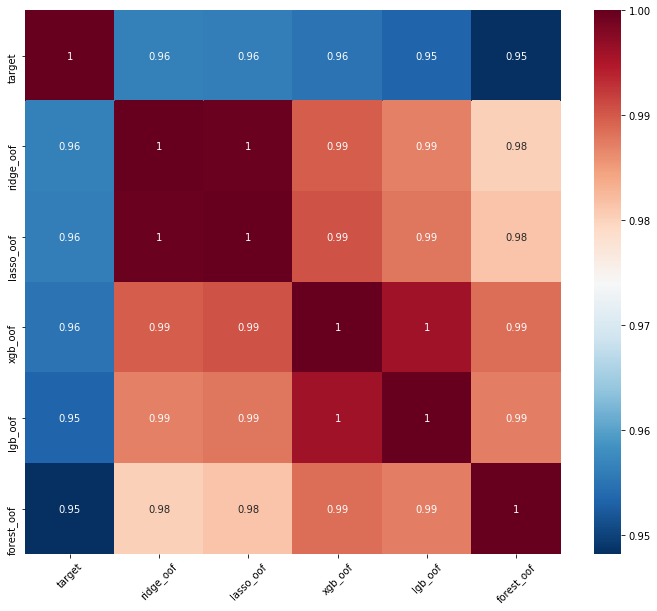

In [4]:
exp.plot_correlations(df[[col for col in df.columns if '_oof' in col]+['target']], 
                      target='target', annot=True)

target        1.000000
ridge_oof     0.956344
lasso_oof     0.956183
xgb_oof       0.955038
lgb_oof       0.953418
forest_oof    0.948226
forest_res    0.558354
xgb_res       0.341029
lgb_res       0.325891
lasso_res     0.305659
ridge_res     0.291753
Name: target, dtype: float64

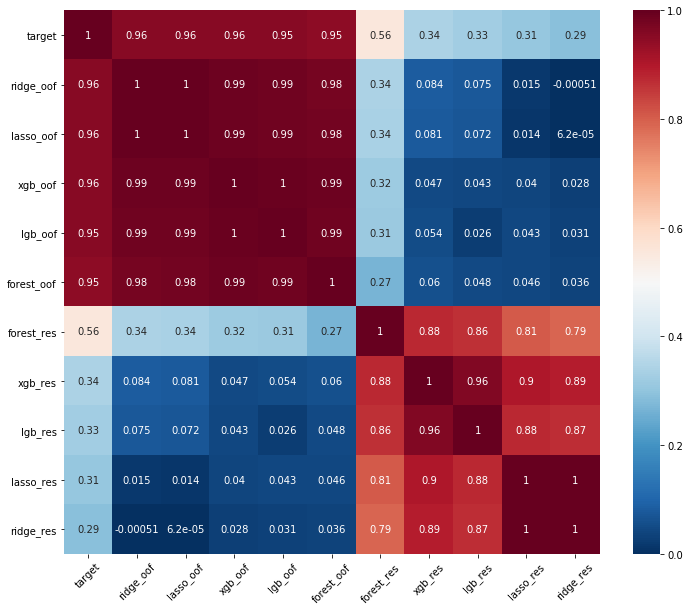

In [6]:
oof_cols = [col for col in df.columns if '_oof' in col]

for col in oof_cols:
    name = col.replace('_oof', '_res')
    df[name] = df['target'] - df[col]
    
exp.plot_correlations(df[[col for col in df.columns if '_oof' in col]+
                     [col for col in df.columns if '_res' in col]+
                     ['target']], target='target', annot=True)

This is even more evident if we look at the following plots.

            lasso_oof  ridge_oof  forest_oof   xgb_oof   lgb_oof  lasso_res  \
lasso_oof    1.000000   0.999656    0.981546  0.990628  0.987936   0.013508   
ridge_oof    0.999656   1.000000    0.980228  0.989843  0.987201   0.015176   
forest_oof   0.981546   0.980228    1.000000  0.988508  0.987443   0.046349   
xgb_oof      0.990628   0.989843    0.988508  1.000000  0.996088   0.040077   
lgb_oof      0.987936   0.987201    0.987443  0.996088  1.000000   0.043297   
lasso_res    0.013508   0.015176    0.046349  0.040077  0.043297   1.000000   
ridge_res    0.000062  -0.000514    0.036422  0.028258  0.031364   0.996234   
forest_res   0.338323   0.342254    0.265968  0.316660  0.314526   0.806682   
xgb_res      0.080560   0.083588    0.060472  0.046984  0.053931   0.902735   
lgb_res      0.072498   0.075335    0.047676  0.043154  0.025527   0.877254   
target       0.956183   0.956344    0.948226  0.955038  0.953418   0.305659   

            ridge_res  forest_res   xgb_res   lgb_r

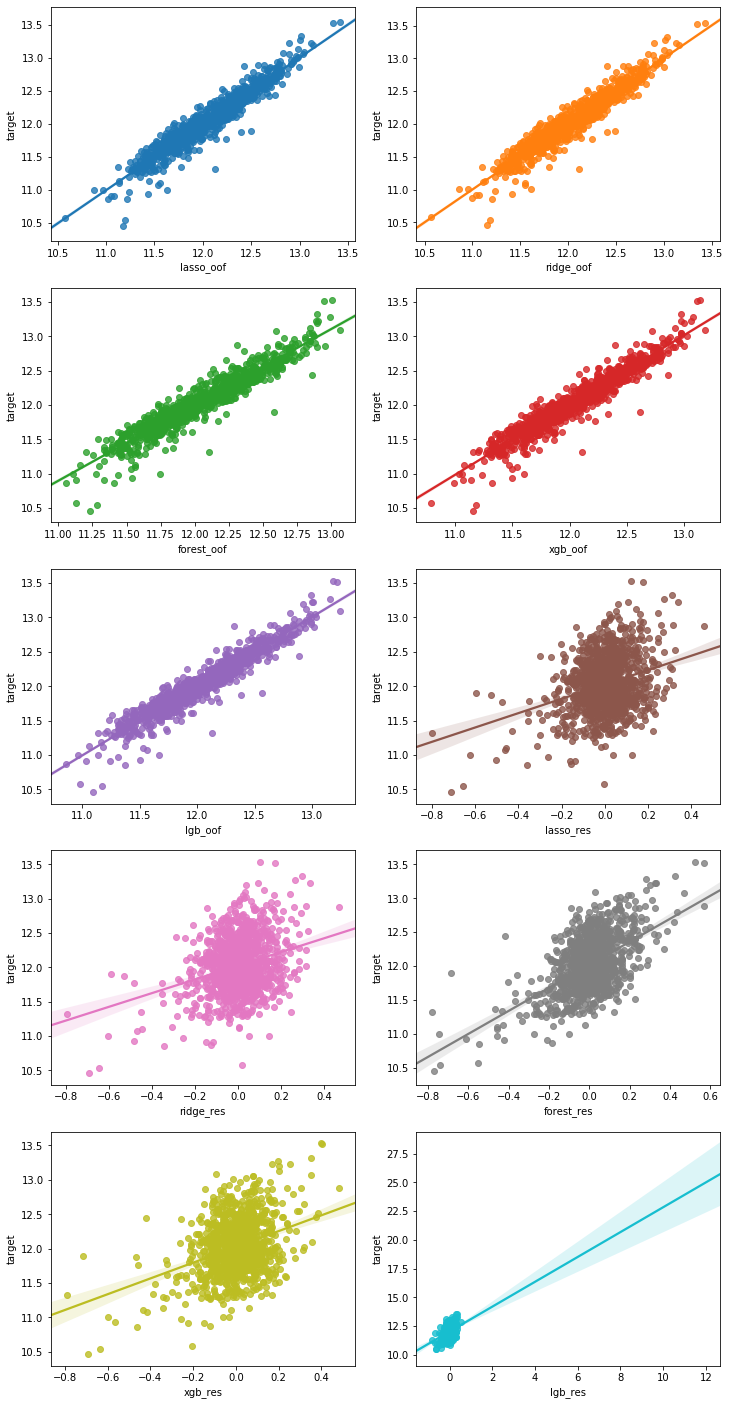

In [8]:
exp.corr_target(df, 'target', 
            [col for col in df.columns if '_oof' in col]+
                [col for col in df.columns if '_res' in col])

Looking at the residual plots, it appears evident that all the models we trained so far are underestimating the price of low costs houses and overestimating the more expensive ones. This could be because we used some target encoding or simply that we are overestimating, for example, the importance of the house size.

We can try to see if there are interesting relations between the residuals and the original features.

lgb_res          1.000000
xgb_res          0.961143
lasso_res        0.877254
ridge_res        0.868569
forest_res       0.864627
target           0.325891
BsmtFinSF1       0.100632
YrSold          -0.080069
OverallCond      0.076944
ridge_oof        0.075335
lasso_oof        0.072498
Id              -0.066717
LowQualFinSF    -0.064402
TotalBsmtSF      0.061472
LotArea          0.059632
GrLivArea        0.058686
ScreenPorch      0.052852
1stFlrSF         0.048997
WoodDeckSF       0.048407
OverallQual      0.047939
forest_oof       0.047676
PoolArea         0.044772
YearBuilt        0.044479
Fireplaces       0.044136
xgb_oof          0.043154
KitchenAbvGr    -0.041202
MasVnrArea       0.040290
GarageCars       0.039057
YearRemodAdd     0.037888
2ndFlrSF         0.033847
TotRmsAbvGrd     0.032270
BsmtUnfSF       -0.032132
BsmtFullBath     0.029115
HalfBath         0.028828
lgb_oof          0.025527
LotFrontage      0.024109
BsmtFinSF2      -0.022572
MSSubClass       0.017471
FullBath    

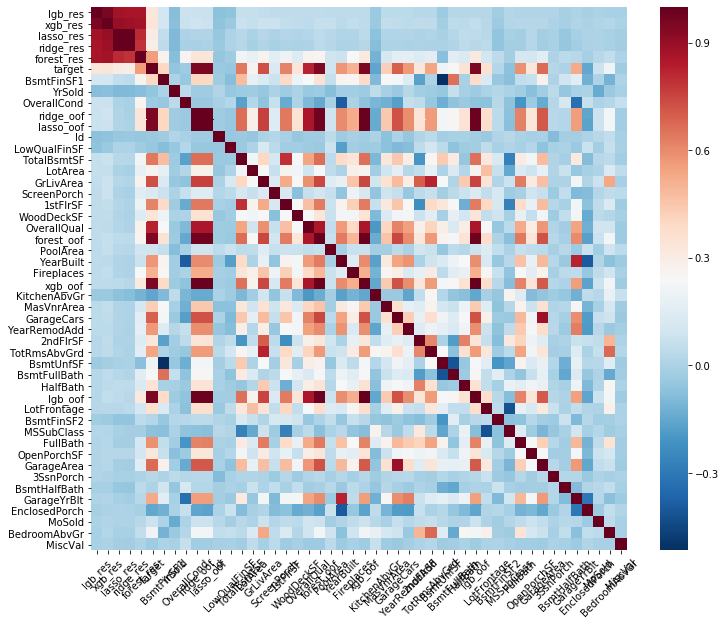

In [10]:
exp.plot_correlations(df, target='lgb_res')

Or, for the categorical features, we can start focusing on the feature that was used both to stratify our folds (and test set) and then to be target encoded: Neighborhood.

,count,mean,max,min,median,std
Neighborhood,,,,,,
Blmngtn,14,-0.003755,0.252137,-0.258945,0.017240,0.138034
Blueste,2,-0.011675,-0.005291,-0.018059,-0.011675,0.009028
BrDale,13,-0.004108,0.128965,-0.135943,-0.004242,0.075754
BrkSide,46,0.032334,0.342120,-0.513648,0.054220,0.158921
ClearCr,22,0.022957,0.294185,-0.507721,0.040667,0.175790
CollgCr,120,0.000308,0.266519,-0.172275,0.001294,0.070654
Crawfor,41,0.032758,0.313422,-0.192891,0.036425,0.115191
Edwards,78,-0.001339,0.363077,-0.662838,0.012647,0.151960
Gilbert,63,0.001887,0.189422,-0.167342,0.007406,0.074671


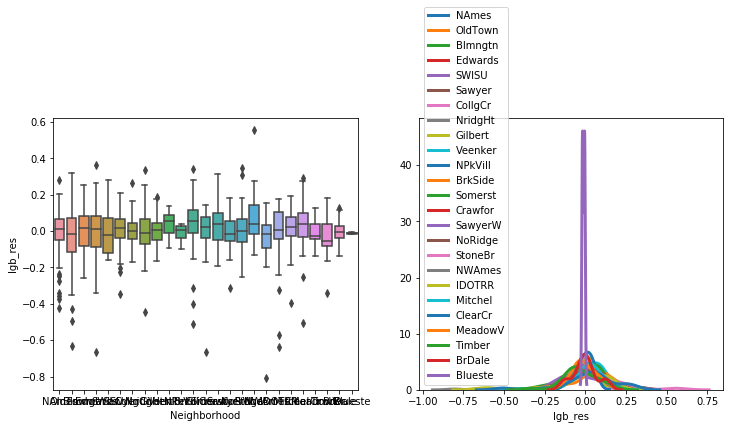

In [23]:
exp.segm_target(df, 'Neighborhood', 'lgb_res')

,Neighborhood,count_res,mean_res,max_res,min_res,median_res,std_res,mean_target,max_target,min_target,median_target,std_target
0,Blmngtn,14,-0.003755,0.252137,-0.258945,0.017240,0.138034,12.179361,12.485831,11.982279,12.133146,0.159205
1,Blueste,2,-0.011675,-0.005291,-0.018059,-0.011675,0.009028,11.826543,11.925042,11.728045,11.826543,0.139298
2,BrDale,13,-0.004108,0.128965,-0.135943,-0.004242,0.075754,11.560918,11.736077,11.355113,11.571204,0.132869
3,BrkSide,46,0.032334,0.342120,-0.513648,0.054220,0.158921,11.676040,12.317171,10.579005,11.706027,0.372509
4,ClearCr,22,0.022957,0.294185,-0.507721,0.040667,0.175790,12.275824,12.700772,11.775297,12.291739,0.234329
5,CollgCr,120,0.000308,0.266519,-0.172275,0.001294,0.070654,12.172197,12.858322,11.608245,12.214770,0.248028
6,Crawfor,41,0.032758,0.313422,-0.192891,0.036425,0.115191,12.229254,12.850557,11.411457,12.289959,0.317566
7,Edwards,78,-0.001339,0.363077,-0.662838,0.012647,0.151960,11.684095,12.524421,10.976799,11.686887,0.289471
8,Gilbert,63,0.001887,0.189422,-0.167342,0.007406,0.074671,12.161274,12.841328,11.856522,12.106258,0.170260
9,IDOTRR,30,-0.026341,0.175755,-0.635507,0.006323,0.198898,11.505145,12.040614,10.460271,11.582903,0.352477


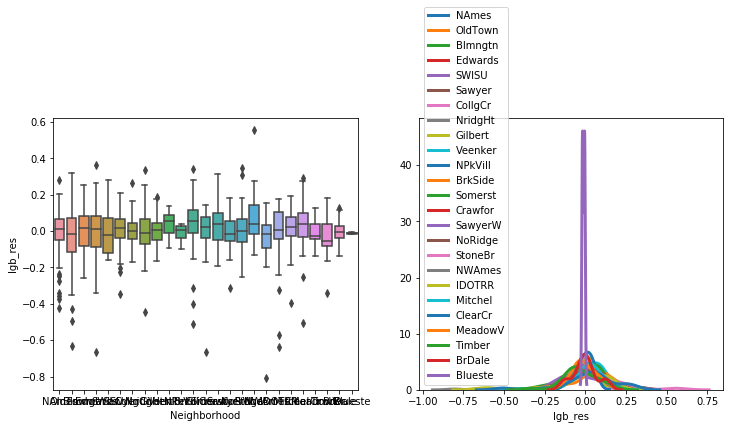

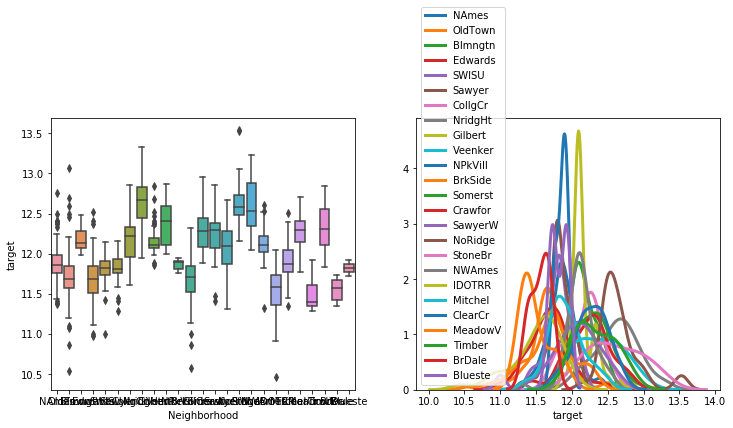

In [28]:
err = exp.segm_target(df, 'Neighborhood', 'lgb_res')
tar = exp.segm_target(df, 'Neighborhood', 'target')

tot = pd.merge(err.reset_index(), tar.reset_index(), on='Neighborhood', suffixes=('_res', '_target'))

del tot['count_target']

tot

In [29]:
tot.corr()

,count_res,mean_res,max_res,min_res,median_res,std_res,mean_target,max_target,min_target,median_target,std_target
count_res,1.000000,-0.111255,0.278148,-0.403828,-0.025091,0.092844,-0.024756,0.352306,-0.206834,-0.020592,0.134504
mean_res,-0.111255,1.000000,0.557643,0.321883,0.800116,0.138772,0.382607,0.292750,0.297795,0.382542,0.346920
max_res,0.278148,0.557643,1.000000,-0.191840,0.331615,0.673882,0.372043,0.604152,-0.038471,0.356032,0.658299
min_res,-0.403828,0.321883,-0.191840,1.000000,-0.016349,-0.649497,0.111581,-0.197498,0.461694,0.099500,-0.348107
median_res,-0.025091,0.800116,0.331615,-0.016349,1.000000,0.255143,0.166646,0.138346,0.070905,0.193398,0.263323
std_res,0.092844,0.138772,0.673882,-0.649497,0.255143,1.000000,0.034464,0.284869,-0.411185,0.042494,0.640332
mean_target,-0.024756,0.382607,0.372043,0.111581,0.166646,0.034464,1.000000,0.823236,0.792766,0.991543,0.222194
max_target,0.352306,0.292750,0.604152,-0.197498,0.138346,0.284869,0.823236,1.000000,0.430760,0.804493,0.531317
min_target,-0.206834,0.297795,-0.038471,0.461694,0.070905,-0.411185,0.792766,0.430760,1.000000,0.760294,-0.316768
median_target,-0.020592,0.382542,0.356032,0.099500,0.193398,0.042494,0.991543,0.804493,0.760294,1.000000,0.246387


A few unsurprising things are:

* the more houses from a neighborhood, the smaller the error on average. Which is also the pattern with the price, so we have to be mindful of that (neighborhood with more examples tend to have lower costs on average).
* We can confirm that neighborhood for which we have houses with higher average cost also get an higher error (not in absolute sense).

This makes me consider if it would be a good idea to not use the target encoding variables and see if that pattern in the error disappears.

Another possible test is to see if some variables we did not include, for example

/home/lucabasa/Git/kaggle_competitions/houseprice/hp/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/lucabasa/Git/kaggle_competitions/houseprice/hp/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,count,mean,max,min,median,std
Exterior1st,,,,,,
AsbShng,12,-0.077154,0.175755,-0.353562,-0.070225,0.137097
AsphShn,1,-0.057223,-0.057223,-0.057223,-0.057223,NaN
BrkComm,2,-0.275193,0.112451,-0.662838,-0.275193,0.548212
BrkFace,38,0.074459,0.342120,-0.188186,0.083093,0.118547
CBlock,1,-0.012961,-0.012961,-0.012961,-0.012961,NaN
CemntBd,44,0.006324,0.276128,-0.158424,-0.004778,0.082507
HdBoard,176,-0.011524,0.347416,-0.345772,-0.013229,0.094851
ImStucc,1,-0.057845,-0.057845,-0.057845,-0.057845,NaN
MetalSd,182,0.012628,0.553204,-0.330023,0.010039,0.111818


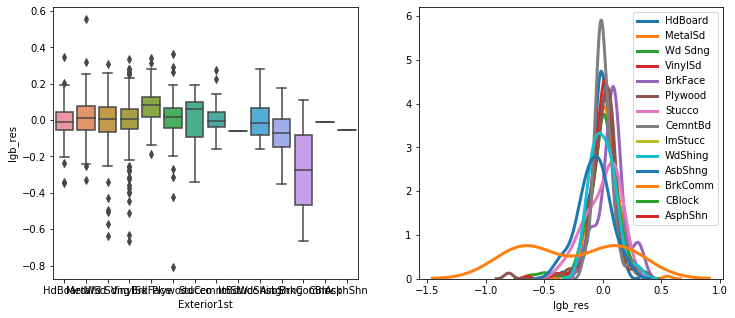

In [38]:
exp.segm_target(df, 'Exterior1st', 'lgb_res')

shows how the `MetalSd` exterior leads to a particularly different pattern in the distribution of the error. A direct inspection of these houses shows the following

In [43]:
df[df.Exterior1st == 'MetalSd'].describe() - df[df.Exterior1st != 'MetalSd'].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,lasso_oof,ridge_oof,forest_oof,xgb_oof,lgb_oof,target,lasso_res,ridge_res,forest_res,xgb_res,lgb_res
count,-802.000000,-802.000000,-641.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-794.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-763.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000
mean,33.059915,12.026936,-9.421806,-2182.179152,-0.635889,0.308329,-17.211918,-9.124777,-18.979013,-67.645604,-14.069072,-51.306319,-133.020995,-152.805101,-21.133309,10.388412,-163.549998,-0.044470,-0.031471,-0.223521,-0.071752,-0.111040,0.031191,-0.458546,-0.215324,-11.979011,-0.303449,-72.777886,-34.382516,-14.751597,18.526199,-4.046748,-0.988352,-3.020325,104.394220,0.150652,-0.013859,-0.198843,-0.196703,-0.185765,-0.191428,-0.194787,-0.179807,0.019036,0.016896,0.005958,0.011621,0.014980
std,-5.602309,10.174723,-5.901617,-5417.188018,-0.111310,-0.032657,-0.449653,1.996339,1.666882,-67.397963,-37.909031,-113.068597,-104.254079,-93.426591,-54.785960,33.079467,-79.585899,-0.008811,-0.076010,-0.021473,0.002602,0.019058,0.068611,-0.014639,-0.035610,0.919317,-0.018979,-7.821897,-25.002583,-10.243068,17.748803,-32.343336,-4.841798,-42.733430,849.649837,-0.067931,-0.060051,-0.075309,-0.075978,-0.074385,-0.075592,-0.073535,-0.088922,-0.013019,-0.012444,-0.030093,-0.014436,-0.010594
min,1.000000,0.000000,3.000000,-177.000000,2.000000,1.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.000000,0.000000,0.000000,186.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550687,0.568205,0.102978,0.286985,0.206499,0.672872,0.488868,0.490385,0.354511,0.449521,0.475537
25%,63.500000,0.000000,-9.000000,-1665.250000,0.000000,0.000000,-18.750000,-15.750000,0.000000,0.000000,0.000000,58.000000,-79.000000,-75.500000,0.000000,0.000000,-72.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-14.000000,0.000000,-70.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.133432,-0.128519,-0.123729,-0.112577,-0.127193,-0.106986,0.010329,0.007516,0.019661,0.001687,0.002955
50%,63.500000,0.000000,-10.000000,-1197.500000,-1.000000,1.000000,-20.000000,-19.000000,0.000000,-26.000000,0.000000,34.500000,-110.500000,-126.000000,0.000000,0.000000,-185.500000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-19.000000,0.000000,-51.500000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.227381,-0.231984,-0.219792,-0.229090,-0.229613,-0.205064,0.011512,0.004757,0.006658,0.008452,0.004263
75%,11.000000,20.000000,-10.000000,-1419.500000,-1.000000,1.000000,-27.000000,-4.250000,-63.750000,-141.250000,0.000000,-78.750000,-248.500000,-237.500000,-79.750000,0.000000,-233.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-10.000000,0.000000,-54.500000,-49.250000,-21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.323064,-0.323255,-0.273456,-0.289335,-0.269117,-0.292436,0.017093,0.013418,-0.006197,0.005749,0.011007
max,-1.000000,0.000000,-175.000000,-129527.000000,-1.000000,0.00

In other words, houses with that particular exterior

* Are less likely to have land in front of them
* Are lower in quality, in particular they never hit the perfect score. This could be interpreted as a bias in the data collection
* Were built less recently, which makes perfect sense as building techniques change with time
* Have much smaller basements and garages
* Are much smaller in general
* Are less likely to have a fireplace
* Cost less in general

We could then consider to include this feature as well and see how the model reacts.

Another approach would be to explore the entries with the biggest errors. For example

In [77]:
df['mean_res'] = df[[col for col in df.columns if '_res' in col]].mean(axis=1)
df['abs_res'] = abs(df['mean_res'])

df.sort_values('abs_res', ascending=False).head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lasso_oof,ridge_oof,forest_oof,xgb_oof,lgb_oof,target,lasso_res,ridge_res,forest_res,xgb_res,lgb_res,new_oof,new_res,mean_res,abs_res
855,633,20,RL,85.0,11900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,209.0,TA,Gd,CBlock,TA,TA,No,ALQ,822,Unf,0,564,1386,GasA,TA,Y,SBrkr,1411,0,0,1411,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1977.0,Fin,2,544,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Family,12.121412,12.118235,12.103163,12.112535,12.126125,11.320566,-0.800846,-0.797670,-0.782597,-0.791969,-0.805560,11.561266,-0.240700,-0.703224,0.703224
803,689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8,6,2007,2007,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,945,Unf,0,474,1419,GasA,Ex,Y,SBrkr,1419,0,0,1419,1,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,2,567,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.419188,12.411345,12.312170,12.397140,12.325816,12.879020,0.459832,0.467675,0.566850,0.481880,0.553204,11.751655,1.127365,0.609468,0.609468
234,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,11.173620,11.153059,11.233007,11.152416,11.095778,10.460271,-0.713350,-0.692788,-0.772737,-0.692145,-0.635507,10.578914,-0.118644,-0.604195,0.604195
486,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,600,600,Grav,Fa,N,SBrkr,600,368,0,968,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,11.198495,11.187803,11.283241,11.179276,11.172855,10.542733,-0.655762,-0.645070,-0.740509,-0.636543,-0.630123,10.652402,-0.109669,-0.569613,0.569613
198,411,20,RL,68.0,9571,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,3,1958,1958,Gable,CompShg,BrkComm,Brk Cmn,None,0.0,TA,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1276,1276,GasA,TA,Y,FuseA,1276,0,0,1276,0,0,1,0,3,1,TA,5,Mod,0,NaN,Attchd,1958.0,Unf,1,350,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,COD,Abnorml,11.625395,11.608327,11.749272,11.600792,11.664954,11.002117,-0.623279,-0.606210,-0.747155,-0.598675,-0.662838,11.121577,-0.119461,-0.559603,0.559603
973,1325,20,RL,75.0,9986,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,428.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1795,1795,GasA,Ex,Y,SBrkr,1795,0,0,1795,0,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,3,895,TA,TA,Y,0,49,0,0,0,0,NaN,NaN,NaN,0,2,2007,New,Partial,12.495255,12.490128,12.583596,12.614542,12.561989,11.898195,-0.597060,-0.591933,-0.685401,-0.716347,-0.663794,11.976826,-0.078631,-0.555528,0.555528
153,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,540,540,GasA,TA,N,FuseA,1044,

In [78]:
high_err = df.sort_values('abs_res', ascending=False).head(50)
low_err = df.sort_values('abs_res', ascending=False).tail(50)

high_err.describe() - low_err.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,lasso_oof,ridge_oof,forest_oof,xgb_oof,lgb_oof,target,lasso_res,ridge_res,forest_res,xgb_res,lgb_res,new_oof,new_res,mean_res,abs_res
count,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,-7.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,-101.380000,-21.700000,6.379268,5132.160000,0.200000,-0.100000,-4.360,1.540000,26.702041,151.300000,-4.020000,131.840000,279.12000,259.620000,-8.480000,11.440000,262.580000,0.020000,0.020000,0.080000,-0.020000,0.00000,0.040000,0.86000,0.120000,-4.116870,-0.060000,-10.0800,15.840000,37.880000,-0.140000,2.880000,19.240000,25.860000,24.080000,0.520000,0.200000,0.128447,0.132415,0.092605,0.089804,0.097268,0.260483,0.132036,0.128069,0.167878,0.170679,0.163216,0.092737,0.167746,0.154937,0.374912
std,-36.191794,-15.679194,-5.628060,7663.461124,0.600292,0.267389,-0.177,2.059431,104.615484,212.905753,6.111369,53.583044,188.99773,129.459934,134.638835,80.893016,365.890639,0.181827,0.056527,0.145997,-0.007306,0.20078,0.142519,0.46591,0.124793,5.650621,0.338632,101.8299,6.404925,73.932862,-1.727108,20.364675,52.198769,129.302053,162.658004,-0.666753,0.005784,0.206732,0.207784,0.162657,0.190255,0.193858,0.406682,0.309478,0.304409,0.342067,0.343905,0.333706,0.184828,0.343972,0.356679,0.091625
min,2.000000,0.000000,12.000000,1670.000000,1.000000,-2.000000,12.000,0.000000,0.000000,0.000000,0.000000,0.000000,270.00000,162.000000,0.000000,0.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000,-4.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207081,0.199162,0.179249,0.161450,0.239953,-0.408317,-0.634451,-0.636066,-0.507199,-0.640378,-0.628887,0.228776,-0.622862,-0.692183,0.291739
25%,-10.500000,0.000000,7.750000,2624.250000,0.000000,0.000000,-8.750,-12.750000,0.000000,0.000000,0.000000,143.500000,54.50000,94.500000,0.000000,0.000000,-14.750000,0.000000,0.000000,0.000000,0.000000,-1.00000,0.000000,-0.25000,0.000000,-14.500000,0.000000,-90.7500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.750000,-0.177535,-0.181602,-0.116033,-0.185691,-0.096936,-0.017090,0.182646,0.164638,0.205931,0.278323,0.245855,-0.092421,0.279421,0.294961,0.308815
50%,-150.500000,-10.000000,2.500000,1669.500000,0.000000,0.000000,-13.500,2.000000,0.000000,38.000000,0.000000,75.000000,243.50000,331.500000,-605.500000,0.000000,-56.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000,-5.000000,0.000000,1.5000,0.000000,27.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.171430,0.178224,0.173783,0.153836,0.153035,0.325332,0.297142,0.286227,0.315627,0.328142,0.325693,0.145906,0.343104,0.310080,0.344468
75%,-221.000000,-23.750000,10.750000,4240.750000,1.000000,0.000000,1.250,4.000000,10.250000,184.250000,0.000000,93.250000,302.00000,368.750000,-23.250000,0.000000,407.750000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.75000,0.000000,3.000000,0.750000,128.2500,26.250000,22.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273760,0.275018,0.184514,0.270326,0.228279,0.566134,0.336755,0.331126,0.382612,0.378244,0.364179,0.217645,0.361270,0.362516,0.397836
max,32.000000,0.000000,7.000000,42063.000000,1.00000